In [44]:
import pandas
import matplotlib
import pandas as pd

matplotlib.use("TkAgg")
pandas.set_option('display.max_columns', None)

In [45]:
path = 'pp-2021.csv'
data = pandas.read_csv(path, sep=',', skiprows=1)


In [46]:
data = data.drop(data.columns[[0, 2, 7, 8, 9, 10, 12, 14, 15]], axis=1)
data.columns = ["Price", "Postcode", "PropertyType", "OldNew", "Duration", "City", "County"]

In [47]:
data = data[~data["PropertyType"].isin(["F", "O"])]
data.describe()



,Price
count,8.686810e+05
mean,3.474940e+05
std,3.789483e+05
min,1.000000e+00
25%,1.775000e+05
50%,2.720000e+05
75%,4.125000e+05
max,4.250000e+07


In [48]:
city_stats = data.groupby('City')['City'].agg('count').sort_values(ascending=False)
city_stats_less_than_1000 = city_stats[city_stats <= 600]
data["City"] = data["City"].apply(lambda x: 'Other' if x in city_stats_less_than_1000 else x)
city_stats

City
LONDON           26311
MANCHESTER       13315
BRISTOL          12349
NOTTINGHAM       12239
BIRMINGHAM       11630
                 ...  
LYNMOUTH             3
RHOSGOCH             2
KELSO                1
LLANSANFFRAID        1
NEWCASTLETON         1
Name: City, Length: 1147, dtype: int64

In [49]:
data = data[data["Price"] > 40000]
data = data[data["Price"] < 5000000]
data.Price.describe()

count    8.658430e+05
mean     3.432514e+05
std      2.911646e+05
min      4.010000e+04
25%      1.785000e+05
50%      2.729950e+05
75%      4.125000e+05
max      4.999999e+06
Name: Price, dtype: float64

<AxesSubplot:ylabel='Density'>

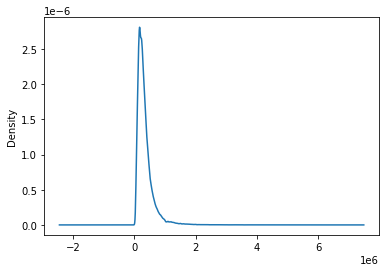

In [50]:
%matplotlib inline
from matplotlib import pyplot as plt
price_data = data["Price"]
ax = price_data.plot.kde()
ax

In [51]:
data.columns

Index(['Price', 'Postcode', 'PropertyType', 'OldNew', 'Duration', 'City',
       'County'],
      dtype='object')

In [52]:
data['PropertyType'] = [ord(x) - 64 for x in data.PropertyType]
cols = data.PropertyType.unique()

In [53]:
data.head()

,Price,Postcode,PropertyType,OldNew,Duration,City,County
0,137000,B98 7BE,20,N,F,REDDITCH,WORCESTERSHIRE
1,337000,B61 8NJ,19,N,F,BROMSGROVE,WORCESTERSHIRE
2,178500,HR2 7RU,19,N,F,HEREFORD,HEREFORDSHIRE
3,178000,B97 6NJ,19,N,F,REDDITCH,WORCESTERSHIRE
4,212500,B96 6AU,19,N,F,REDDITCH,WORCESTERSHIRE


In [54]:
data['OldNew'] = data['OldNew'].map({'Y': 1, 'N': 0})
data.head()

,Price,Postcode,PropertyType,OldNew,Duration,City,County
0,137000,B98 7BE,20,0,F,REDDITCH,WORCESTERSHIRE
1,337000,B61 8NJ,19,0,F,BROMSGROVE,WORCESTERSHIRE
2,178500,HR2 7RU,19,0,F,HEREFORD,HEREFORDSHIRE
3,178000,B97 6NJ,19,0,F,REDDITCH,WORCESTERSHIRE
4,212500,B96 6AU,19,0,F,REDDITCH,WORCESTERSHIRE


In [55]:
data['Duration'] = [ord(x) - 64 for x in data.Duration]

In [56]:
data.head()

,Price,Postcode,PropertyType,OldNew,Duration,City,County
0,137000,B98 7BE,20,0,6,REDDITCH,WORCESTERSHIRE
1,337000,B61 8NJ,19,0,6,BROMSGROVE,WORCESTERSHIRE
2,178500,HR2 7RU,19,0,6,HEREFORD,HEREFORDSHIRE
3,178000,B97 6NJ,19,0,6,REDDITCH,WORCESTERSHIRE
4,212500,B96 6AU,19,0,6,REDDITCH,WORCESTERSHIRE


In [57]:
import sys
!{sys.executable} -m pip install postcodes_io_api

In [58]:
!conda install --channel conda-forge --yes --prefix {sys.prefix} pgeocode
# try this library pgeocode 0.3.0  instead

Solving environment: ...working... done

# All requested packages already installed.



In [59]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
codes = [str(x) for x in data.Postcode]
codes = [x[0:x.index(" ")] for x in codes if " " in x]
data

,Price,Postcode,PropertyType,OldNew,Duration,City,County
0,137000,B98 7BE,20,0,6,REDDITCH,WORCESTERSHIRE
1,337000,B61 8NJ,19,0,6,BROMSGROVE,WORCESTERSHIRE
2,178500,HR2 7RU,19,0,6,HEREFORD,HEREFORDSHIRE
3,178000,B97 6NJ,19,0,6,REDDITCH,WORCESTERSHIRE
4,212500,B96 6AU,19,0,6,REDDITCH,WORCESTERSHIRE
...,...,...,...,...,...,...,...
865627,155000,WS15 2AU,20,0,6,RUGELEY,STAFFORDSHIRE
865628,167200,B77 2JF,20,0,6,TAMWORTH,STAFFORDSHIRE
865629,90000,DE14 3PH,20,0,6,BURTON-ON-TRENT,STAFFORDSHIRE
865630,255000,WV10 7TU,4,0,6,WOLVERHAMPTON,STAFFORDSHIRE


In [60]:
import pgeocode
nomi = pgeocode.Nominatim("GB")
post_code_info = nomi.query_postal_code(codes)
latitude = post_code_info.latitude
longitude = post_code_info.longitude
post_code_info

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,B98,GB,"Branson's Cross, Beoley, Holt End",England,ENG,Worcestershire,11609023,NaN,NaN,52.3238,-1.896100,3.0
1,B61,GB,"Upton Warren, Dodford, Bournheath, Upper Catsh...",England,ENG,Worcestershire,11609023,NaN,NaN,52.3052,-2.076450,4.0
2,HR2,GB,"Lower Bullingham, Little Dewchurch, Allensmore...",England,ENG,Herefordshire,11609017,NaN,NaN,52.0333,-2.796545,4.0
3,B97,GB,"Webheath, Walkwood, Ham Green, Hunt End, Hewel...",England,ENG,Worcestershire,11609023,NaN,NaN,52.2922,-1.943288,3.0
4,B96,GB,"Sambourne, Holberrow Green, Astwood Bank, Feck...",England,ENG,Warwickshire,11609021,NaN,NaN,52.2581,-1.958087,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
865627,WS15,GB,"Cannock Wood, Blithbury, Upper Longdon, Breret...",England,ENG,Staffordshire,11609018,NaN,NaN,52.7075,-1.903044,3.0
865628,B77,GB,"Wilnecote, Kettlebrook, Amington, Two Gates, D...",England,ENG,Staffordshire,11609018,NaN,NaN,52.6065,-1.666383,4.0
865629,DE14,GB,"Burton upon Trent, Branston",England,ENG,Staffordshire,11609018,NaN,NaN,52.8073,-1.654650,4.0
865630,WV10,GB,"Heath Town, Standeford, Oxley, Shareshill, Fea...",England,ENG,Staffordshire,11609018,NaN,NaN,52.6511,-2.101429,3.0


In [61]:
df1 = pandas.concat([pandas.Series(codes), pandas.Series(codes)], axis=1)
df1

,0,1
0,B98,B98
1,B61,B61
2,HR2,HR2
3,B97,B97
4,B96,B96
...,...,...
865627,WS15,WS15
865628,B77,B77
865629,DE14,DE14
865630,WV10,WV10


In [62]:
data['Longitude'] = longitude
data['Latitude'] = latitude
len(codes), len(data.Postcode), len(data)
data.drop(['Postcode'], inplace=True, axis=1)
data.drop(['County'], inplace=True, axis=1)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Price,PropertyType,OldNew,Duration,City,Longitude,Latitude
0,137000,20,0,6,REDDITCH,-1.896100,52.3238
1,337000,19,0,6,BROMSGROVE,-2.076450,52.3052
2,178500,19,0,6,HEREFORD,-2.796545,52.0333
3,178000,19,0,6,REDDITCH,-1.943288,52.2922
4,212500,19,0,6,REDDITCH,-1.958087,52.2581
...,...,...,...,...,...,...,...
864146,155000,20,0,6,RUGELEY,-1.903044,52.7075
864147,167200,20,0,6,TAMWORTH,-1.666383,52.6065
864148,90000,20,0,6,BURTON-ON-TRENT,-1.654650,52.8073
864149,255000,4,0,6,WOLVERHAMPTON,-2.101429,52.6511


In [63]:
dummies = pandas.get_dummies(data.City)
dummies

,ABERDARE,ABINGDON,ACCRINGTON,ALDERSHOT,ALFRETON,ALTRINCHAM,ANDOVER,ASHFORD,ASHTON-UNDER-LYNE,AYLESBURY,BANBURY,BARNET,BARNSLEY,BARNSTAPLE,BARROW-IN-FURNESS,BARRY,BASILDON,BASINGSTOKE,BATH,BEDFORD,BELPER,BENFLEET,BEVERLEY,BEXHILL-ON-SEA,BEXLEYHEATH,BICESTER,BIDEFORD,BILLERICAY,BILLINGHAM,BILSTON,BIRKENHEAD,BIRMINGHAM,BISHOP AUCKLAND,BISHOP'S STORTFORD,BLACKBURN,BLACKPOOL,BLYTH,BOGNOR REGIS,BOLTON,BOOTLE,BOSTON,BOURNEMOUTH,BRACKNELL,BRADFORD,BRAINTREE,BRENTWOOD,BRIDGEND,BRIDGWATER,BRIDLINGTON,BRIGHTON,BRISTOL,BROMLEY,BROMSGROVE,BUCKINGHAM,BURGESS HILL,BURNLEY,BURTON-ON-TRENT,BURY,BURY ST EDMUNDS,CAERPHILLY,CAMBERLEY,CAMBRIDGE,CANNOCK,CANTERBURY,CANVEY ISLAND,CARDIFF,CARLISLE,CARMARTHEN,CASTLEFORD,CHATHAM,CHEADLE,CHELMSFORD,CHELTENHAM,CHESTER,CHESTER LE STREET,CHESTERFIELD,CHICHESTER,CHIPPENHAM,CHORLEY,CHRISTCHURCH,CIRENCESTER,CLACTON-ON-SEA,CLEETHORPES,CLITHEROE,COALVILLE,COLCHESTER,CONGLETON,CONSETT,CORBY,COVENTRY,CRAWLEY,CREWE,CROYDON,CWMBRAN,DAGENHAM,DARLINGTON,DARTFORD,DARWEN,DAVENTRY,DEAL,DEESIDE,DERBY,DEREHAM,DEVIZES,DEWSBURY,DIDCOT,DONCASTER,DORCHESTER,DOVER,DRIFFIELD,DUDLEY,DUNSTABLE,DURHAM,EASTBOURNE,EASTLEIGH,ELLESMERE PORT,ELY,ENFIELD,EPSOM,EVESHAM,EXETER,EXMOUTH,FAREHAM,FARNBOROUGH,FARNHAM,FLEET,FOLKESTONE,FROME,GAINSBOROUGH,GATESHEAD,GILLINGHAM,GLOUCESTER,GODALMING,GOOLE,GOSPORT,GRANTHAM,GRAVESEND,GRAYS,GREAT YARMOUTH,GRIMSBY,GUILDFORD,HAILSHAM,HALESOWEN,HALIFAX,HARLOW,HARROGATE,HARROW,HARTLEPOOL,HASTINGS,HAVANT,HAVERFORDWEST,HAYES,HAYWARDS HEATH,HEMEL HEMPSTEAD,HEREFORD,HERNE BAY,HIGH WYCOMBE,HINCKLEY,HITCHIN,HORNCHURCH,HORSHAM,HOUGHTON LE SPRING,HOVE,HUDDERSFIELD,HULL,HUNTINGDON,HYDE,ILFORD,ILKESTON,ILKLEY,IPSWICH,KEIGHLEY,KENDAL,KETTERING,KIDDERMINSTER,KING'S LYNN,KINGSWINFORD,LANCASTER,LEAMINGTON SPA,LEATHERHEAD,LEEDS,LEICESTER,LEIGH,LEIGH-ON-SEA,LEIGHTON BUZZARD,LEYLAND,LICHFIELD,LINCOLN,LITTLEHAMPTON,LIVERPOOL,LLANELLI,LONDON,LOUGHBOROUGH,LOUTH,LOWESTOFT,LUTON,LYMINGTON,LYTHAM ST ANNES,MACCLESFIELD,MAIDENHEAD,MAIDSTONE,MALDON,MALVERN,MANCHESTER,MANSFIELD,MARCH,MARGATE,MARKET HARBOROUGH,MATLOCK,MELTON MOWBRAY,MERTHYR TYDFIL,MIDDLESBROUGH,MILTON KEYNES,MORECAMBE,MORPETH,NANTWICH,NEATH,NELSON,NEWARK,NEWBURY,NEWCASTLE,NEWCASTLE UPON TYNE,NEWPORT,NEWTON ABBOT,NORTH SHIELDS,NORTHAMPTON,NORTHWICH,NORWICH,NOTTINGHAM,NUNEATON,OLDBURY,OLDHAM,ORMSKIRK,ORPINGTON,OSWESTRY,OXFORD,Other,PAIGNTON,PENRITH,PENZANCE,PETERBOROUGH,PETERLEE,PLYMOUTH,PONTEFRACT,PONTYPOOL,PONTYPRIDD,POOLE,PORT TALBOT,PORTSMOUTH,POULTON-LE-FYLDE,PRESCOT,PRESTON,PUDSEY,RAMSGATE,RAYLEIGH,READING,REDCAR,REDDITCH,REDHILL,RETFORD,RHYL,RICHMOND,ROCHDALE,ROCHESTER,ROMFORD,ROSSENDALE,ROTHERHAM,ROYSTON,RUGBY,RUGELEY,RUISLIP,RUNCORN,RUSHDEN,SALE,SALFORD,SALISBURY,SANDBACH,SCARBOROUGH,SCUNTHORPE,SELBY,SEVENOAKS,SHEERNESS,SHEFFIELD,SHIPLEY,SHREWSBURY,SIDCUP,SITTINGBOURNE,SKEGNESS,SKELMERSDALE,SLEAFORD,SLOUGH,SOLIHULL,SOUTH CROYDON,SOUTH SHIELDS,SOUTHAMPTON,SOUTHEND-ON-SEA,SOUTHPORT,SOUTHSEA,SPALDING,ST ALBANS,ST AUSTELL,ST HELENS,ST IVES,ST LEONARDS-ON-SEA,ST NEOTS,STAFFORD,STAMFORD,STANFORD-LE-HOPE,STANLEY,STEVENAGE,STOCKPORT,STOCKTON-ON-TEES,STOKE-ON-TRENT,STOURBRIDGE,STOWMARKET,STRATFORD-UPON-AVON,STROUD,SUDBURY,SUNDERLAND,SUTTON,SUTTON COLDFIELD,SUTTON-IN-ASHFIELD,SWADLINCOTE,SWANSEA,SWINDON,TAMWORTH,TAUNTON,TELFORD,THETFORD,THORNTON-CLEVELEYS,TONBRIDGE,TORQUAY,TROWBRIDGE,TRURO,TUNBRIDGE WELLS,TWICKENHAM,UXBRIDGE,WAKEFIELD,WALLASEY,WALLSEND,WALSALL,WALTHAM CROSS,WALTON-ON-THAMES,WARRINGTON,WARWICK,WASHINGTON,WATERLOOVILLE,WATFORD,WELLINGBOROUGH,WESTON-SUPER-MARE,WEYMOUTH,WHITLEY BAY,WHITSTABLE,WICKFORD,WIDNES,WIGAN,WIGSTON,WILMSLOW,WIMBORNE,WINCHESTER,WINDSOR,WIRRAL,WISBECH,WITNEY,WOKING,WOKINGHAM,WOLVERHAMPTON,WOODBRIDGE,WORCESTER,WORKSOP,WORTHING,WREXHAM,YEOVIL,YORK
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [64]:
dummies.drop(('Other'), inplace=True, axis=1)
dummies

,ABERDARE,ABINGDON,ACCRINGTON,ALDERSHOT,ALFRETON,ALTRINCHAM,ANDOVER,ASHFORD,ASHTON-UNDER-LYNE,AYLESBURY,BANBURY,BARNET,BARNSLEY,BARNSTAPLE,BARROW-IN-FURNESS,BARRY,BASILDON,BASINGSTOKE,BATH,BEDFORD,BELPER,BENFLEET,BEVERLEY,BEXHILL-ON-SEA,BEXLEYHEATH,BICESTER,BIDEFORD,BILLERICAY,BILLINGHAM,BILSTON,BIRKENHEAD,BIRMINGHAM,BISHOP AUCKLAND,BISHOP'S STORTFORD,BLACKBURN,BLACKPOOL,BLYTH,BOGNOR REGIS,BOLTON,BOOTLE,BOSTON,BOURNEMOUTH,BRACKNELL,BRADFORD,BRAINTREE,BRENTWOOD,BRIDGEND,BRIDGWATER,BRIDLINGTON,BRIGHTON,BRISTOL,BROMLEY,BROMSGROVE,BUCKINGHAM,BURGESS HILL,BURNLEY,BURTON-ON-TRENT,BURY,BURY ST EDMUNDS,CAERPHILLY,CAMBERLEY,CAMBRIDGE,CANNOCK,CANTERBURY,CANVEY ISLAND,CARDIFF,CARLISLE,CARMARTHEN,CASTLEFORD,CHATHAM,CHEADLE,CHELMSFORD,CHELTENHAM,CHESTER,CHESTER LE STREET,CHESTERFIELD,CHICHESTER,CHIPPENHAM,CHORLEY,CHRISTCHURCH,CIRENCESTER,CLACTON-ON-SEA,CLEETHORPES,CLITHEROE,COALVILLE,COLCHESTER,CONGLETON,CONSETT,CORBY,COVENTRY,CRAWLEY,CREWE,CROYDON,CWMBRAN,DAGENHAM,DARLINGTON,DARTFORD,DARWEN,DAVENTRY,DEAL,DEESIDE,DERBY,DEREHAM,DEVIZES,DEWSBURY,DIDCOT,DONCASTER,DORCHESTER,DOVER,DRIFFIELD,DUDLEY,DUNSTABLE,DURHAM,EASTBOURNE,EASTLEIGH,ELLESMERE PORT,ELY,ENFIELD,EPSOM,EVESHAM,EXETER,EXMOUTH,FAREHAM,FARNBOROUGH,FARNHAM,FLEET,FOLKESTONE,FROME,GAINSBOROUGH,GATESHEAD,GILLINGHAM,GLOUCESTER,GODALMING,GOOLE,GOSPORT,GRANTHAM,GRAVESEND,GRAYS,GREAT YARMOUTH,GRIMSBY,GUILDFORD,HAILSHAM,HALESOWEN,HALIFAX,HARLOW,HARROGATE,HARROW,HARTLEPOOL,HASTINGS,HAVANT,HAVERFORDWEST,HAYES,HAYWARDS HEATH,HEMEL HEMPSTEAD,HEREFORD,HERNE BAY,HIGH WYCOMBE,HINCKLEY,HITCHIN,HORNCHURCH,HORSHAM,HOUGHTON LE SPRING,HOVE,HUDDERSFIELD,HULL,HUNTINGDON,HYDE,ILFORD,ILKESTON,ILKLEY,IPSWICH,KEIGHLEY,KENDAL,KETTERING,KIDDERMINSTER,KING'S LYNN,KINGSWINFORD,LANCASTER,LEAMINGTON SPA,LEATHERHEAD,LEEDS,LEICESTER,LEIGH,LEIGH-ON-SEA,LEIGHTON BUZZARD,LEYLAND,LICHFIELD,LINCOLN,LITTLEHAMPTON,LIVERPOOL,LLANELLI,LONDON,LOUGHBOROUGH,LOUTH,LOWESTOFT,LUTON,LYMINGTON,LYTHAM ST ANNES,MACCLESFIELD,MAIDENHEAD,MAIDSTONE,MALDON,MALVERN,MANCHESTER,MANSFIELD,MARCH,MARGATE,MARKET HARBOROUGH,MATLOCK,MELTON MOWBRAY,MERTHYR TYDFIL,MIDDLESBROUGH,MILTON KEYNES,MORECAMBE,MORPETH,NANTWICH,NEATH,NELSON,NEWARK,NEWBURY,NEWCASTLE,NEWCASTLE UPON TYNE,NEWPORT,NEWTON ABBOT,NORTH SHIELDS,NORTHAMPTON,NORTHWICH,NORWICH,NOTTINGHAM,NUNEATON,OLDBURY,OLDHAM,ORMSKIRK,ORPINGTON,OSWESTRY,OXFORD,PAIGNTON,PENRITH,PENZANCE,PETERBOROUGH,PETERLEE,PLYMOUTH,PONTEFRACT,PONTYPOOL,PONTYPRIDD,POOLE,PORT TALBOT,PORTSMOUTH,POULTON-LE-FYLDE,PRESCOT,PRESTON,PUDSEY,RAMSGATE,RAYLEIGH,READING,REDCAR,REDDITCH,REDHILL,RETFORD,RHYL,RICHMOND,ROCHDALE,ROCHESTER,ROMFORD,ROSSENDALE,ROTHERHAM,ROYSTON,RUGBY,RUGELEY,RUISLIP,RUNCORN,RUSHDEN,SALE,SALFORD,SALISBURY,SANDBACH,SCARBOROUGH,SCUNTHORPE,SELBY,SEVENOAKS,SHEERNESS,SHEFFIELD,SHIPLEY,SHREWSBURY,SIDCUP,SITTINGBOURNE,SKEGNESS,SKELMERSDALE,SLEAFORD,SLOUGH,SOLIHULL,SOUTH CROYDON,SOUTH SHIELDS,SOUTHAMPTON,SOUTHEND-ON-SEA,SOUTHPORT,SOUTHSEA,SPALDING,ST ALBANS,ST AUSTELL,ST HELENS,ST IVES,ST LEONARDS-ON-SEA,ST NEOTS,STAFFORD,STAMFORD,STANFORD-LE-HOPE,STANLEY,STEVENAGE,STOCKPORT,STOCKTON-ON-TEES,STOKE-ON-TRENT,STOURBRIDGE,STOWMARKET,STRATFORD-UPON-AVON,STROUD,SUDBURY,SUNDERLAND,SUTTON,SUTTON COLDFIELD,SUTTON-IN-ASHFIELD,SWADLINCOTE,SWANSEA,SWINDON,TAMWORTH,TAUNTON,TELFORD,THETFORD,THORNTON-CLEVELEYS,TONBRIDGE,TORQUAY,TROWBRIDGE,TRURO,TUNBRIDGE WELLS,TWICKENHAM,UXBRIDGE,WAKEFIELD,WALLASEY,WALLSEND,WALSALL,WALTHAM CROSS,WALTON-ON-THAMES,WARRINGTON,WARWICK,WASHINGTON,WATERLOOVILLE,WATFORD,WELLINGBOROUGH,WESTON-SUPER-MARE,WEYMOUTH,WHITLEY BAY,WHITSTABLE,WICKFORD,WIDNES,WIGAN,WIGSTON,WILMSLOW,WIMBORNE,WINCHESTER,WINDSOR,WIRRAL,WISBECH,WITNEY,WOKING,WOKINGHAM,WOLVERHAMPTON,WOODBRIDGE,WORCESTER,WORKSOP,WORTHING,WREXHAM,YEOVIL,YORK
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [65]:
data = pd.concat([data, dummies], axis=1)
data

,Price,PropertyType,OldNew,Duration,City,Longitude,Latitude,ABERDARE,ABINGDON,ACCRINGTON,ALDERSHOT,ALFRETON,ALTRINCHAM,ANDOVER,ASHFORD,ASHTON-UNDER-LYNE,AYLESBURY,BANBURY,BARNET,BARNSLEY,BARNSTAPLE,BARROW-IN-FURNESS,BARRY,BASILDON,BASINGSTOKE,BATH,BEDFORD,BELPER,BENFLEET,BEVERLEY,BEXHILL-ON-SEA,BEXLEYHEATH,BICESTER,BIDEFORD,BILLERICAY,BILLINGHAM,BILSTON,BIRKENHEAD,BIRMINGHAM,BISHOP AUCKLAND,BISHOP'S STORTFORD,BLACKBURN,BLACKPOOL,BLYTH,BOGNOR REGIS,BOLTON,BOOTLE,BOSTON,BOURNEMOUTH,BRACKNELL,BRADFORD,BRAINTREE,BRENTWOOD,BRIDGEND,BRIDGWATER,BRIDLINGTON,BRIGHTON,BRISTOL,BROMLEY,BROMSGROVE,BUCKINGHAM,BURGESS HILL,BURNLEY,BURTON-ON-TRENT,BURY,BURY ST EDMUNDS,CAERPHILLY,CAMBERLEY,CAMBRIDGE,CANNOCK,CANTERBURY,CANVEY ISLAND,CARDIFF,CARLISLE,CARMARTHEN,CASTLEFORD,CHATHAM,CHEADLE,CHELMSFORD,CHELTENHAM,CHESTER,CHESTER LE STREET,CHESTERFIELD,CHICHESTER,CHIPPENHAM,CHORLEY,CHRISTCHURCH,CIRENCESTER,CLACTON-ON-SEA,CLEETHORPES,CLITHEROE,COALVILLE,COLCHESTER,CONGLETON,CONSETT,CORBY,COVENTRY,CRAWLEY,CREWE,CROYDON,CWMBRAN,DAGENHAM,DARLINGTON,DARTFORD,DARWEN,DAVENTRY,DEAL,DEESIDE,DERBY,DEREHAM,DEVIZES,DEWSBURY,DIDCOT,DONCASTER,DORCHESTER,DOVER,DRIFFIELD,DUDLEY,DUNSTABLE,DURHAM,EASTBOURNE,EASTLEIGH,ELLESMERE PORT,ELY,ENFIELD,EPSOM,EVESHAM,EXETER,EXMOUTH,FAREHAM,FARNBOROUGH,FARNHAM,FLEET,FOLKESTONE,FROME,GAINSBOROUGH,GATESHEAD,GILLINGHAM,GLOUCESTER,GODALMING,GOOLE,GOSPORT,GRANTHAM,GRAVESEND,GRAYS,GREAT YARMOUTH,GRIMSBY,GUILDFORD,HAILSHAM,HALESOWEN,HALIFAX,HARLOW,HARROGATE,HARROW,HARTLEPOOL,HASTINGS,HAVANT,HAVERFORDWEST,HAYES,HAYWARDS HEATH,HEMEL HEMPSTEAD,HEREFORD,HERNE BAY,HIGH WYCOMBE,HINCKLEY,HITCHIN,HORNCHURCH,HORSHAM,HOUGHTON LE SPRING,HOVE,HUDDERSFIELD,HULL,HUNTINGDON,HYDE,ILFORD,ILKESTON,ILKLEY,IPSWICH,KEIGHLEY,KENDAL,KETTERING,KIDDERMINSTER,KING'S LYNN,KINGSWINFORD,LANCASTER,LEAMINGTON SPA,LEATHERHEAD,LEEDS,LEICESTER,LEIGH,LEIGH-ON-SEA,LEIGHTON BUZZARD,LEYLAND,LICHFIELD,LINCOLN,LITTLEHAMPTON,LIVERPOOL,LLANELLI,LONDON,LOUGHBOROUGH,LOUTH,LOWESTOFT,LUTON,LYMINGTON,LYTHAM ST ANNES,MACCLESFIELD,MAIDENHEAD,MAIDSTONE,MALDON,MALVERN,MANCHESTER,MANSFIELD,MARCH,MARGATE,MARKET HARBOROUGH,MATLOCK,MELTON MOWBRAY,MERTHYR TYDFIL,MIDDLESBROUGH,MILTON KEYNES,MORECAMBE,MORPETH,NANTWICH,NEATH,NELSON,NEWARK,NEWBURY,NEWCASTLE,NEWCASTLE UPON TYNE,NEWPORT,NEWTON ABBOT,NORTH SHIELDS,NORTHAMPTON,NORTHWICH,NORWICH,NOTTINGHAM,NUNEATON,OLDBURY,OLDHAM,ORMSKIRK,ORPINGTON,OSWESTRY,OXFORD,PAIGNTON,PENRITH,PENZANCE,PETERBOROUGH,PETERLEE,PLYMOUTH,PONTEFRACT,PONTYPOOL,PONTYPRIDD,POOLE,PORT TALBOT,PORTSMOUTH,POULTON-LE-FYLDE,PRESCOT,PRESTON,PUDSEY,RAMSGATE,RAYLEIGH,READING,REDCAR,REDDITCH,REDHILL,RETFORD,RHYL,RICHMOND,ROCHDALE,ROCHESTER,ROMFORD,ROSSENDALE,ROTHERHAM,ROYSTON,RUGBY,RUGELEY,RUISLIP,RUNCORN,RUSHDEN,SALE,SALFORD,SALISBURY,SANDBACH,SCARBOROUGH,SCUNTHORPE,SELBY,SEVENOAKS,SHEERNESS,SHEFFIELD,SHIPLEY,SHREWSBURY,SIDCUP,SITTINGBOURNE,SKEGNESS,SKELMERSDALE,SLEAFORD,SLOUGH,SOLIHULL,SOUTH CROYDON,SOUTH SHIELDS,SOUTHAMPTON,SOUTHEND-ON-SEA,SOUTHPORT,SOUTHSEA,SPALDING,ST ALBANS,ST AUSTELL,ST HELENS,ST IVES,ST LEONARDS-ON-SEA,ST NEOTS,STAFFORD,STAMFORD,STANFORD-LE-HOPE,STANLEY,STEVENAGE,STOCKPORT,STOCKTON-ON-TEES,STOKE-ON-TRENT,STOURBRIDGE,STOWMARKET,STRATFORD-UPON-AVON,STROUD,SUDBURY,SUNDERLAND,SUTTON,SUTTON COLDFIELD,SUTTON-IN-ASHFIELD,SWADLINCOTE,SWANSEA,SWINDON,TAMWORTH,TAUNTON,TELFORD,THETFORD,THORNTON-CLEVELEYS,TONBRIDGE,TORQUAY,TROWBRIDGE,TRURO,TUNBRIDGE WELLS,TWICKENHAM,UXBRIDGE,WAKEFIELD,WALLASEY,WALLSEND,WALSALL,WALTHAM CROSS,WALTON-ON-THAMES,WARRINGTON,WARWICK,WASHINGTON,WATERLOOVILLE,WATFORD,WELLINGBOROUGH,WESTON-SUPER-MARE,WEYMOUTH,WHITLEY BAY,WHITSTABLE,WICKFORD,WIDNES,WIGAN,WIGSTON,WILMSLOW,WIMBORNE,WINCHESTER,WINDSOR,WIRRAL,WISBECH,WITNEY,WOKING,WOKINGHAM,WOLVERHAMPTON,WOODBRIDGE,WORCESTER,WORKSOP,WORTHING,WREXHAM,YEOVIL,YORK
0,137000,20,0,6,REDDITCH,-1.896100,52.3238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [66]:
#data.drop(['City'], inplace=True, axis=1)
data

,Price,PropertyType,OldNew,Duration,City,Longitude,Latitude,ABERDARE,ABINGDON,ACCRINGTON,ALDERSHOT,ALFRETON,ALTRINCHAM,ANDOVER,ASHFORD,ASHTON-UNDER-LYNE,AYLESBURY,BANBURY,BARNET,BARNSLEY,BARNSTAPLE,BARROW-IN-FURNESS,BARRY,BASILDON,BASINGSTOKE,BATH,BEDFORD,BELPER,BENFLEET,BEVERLEY,BEXHILL-ON-SEA,BEXLEYHEATH,BICESTER,BIDEFORD,BILLERICAY,BILLINGHAM,BILSTON,BIRKENHEAD,BIRMINGHAM,BISHOP AUCKLAND,BISHOP'S STORTFORD,BLACKBURN,BLACKPOOL,BLYTH,BOGNOR REGIS,BOLTON,BOOTLE,BOSTON,BOURNEMOUTH,BRACKNELL,BRADFORD,BRAINTREE,BRENTWOOD,BRIDGEND,BRIDGWATER,BRIDLINGTON,BRIGHTON,BRISTOL,BROMLEY,BROMSGROVE,BUCKINGHAM,BURGESS HILL,BURNLEY,BURTON-ON-TRENT,BURY,BURY ST EDMUNDS,CAERPHILLY,CAMBERLEY,CAMBRIDGE,CANNOCK,CANTERBURY,CANVEY ISLAND,CARDIFF,CARLISLE,CARMARTHEN,CASTLEFORD,CHATHAM,CHEADLE,CHELMSFORD,CHELTENHAM,CHESTER,CHESTER LE STREET,CHESTERFIELD,CHICHESTER,CHIPPENHAM,CHORLEY,CHRISTCHURCH,CIRENCESTER,CLACTON-ON-SEA,CLEETHORPES,CLITHEROE,COALVILLE,COLCHESTER,CONGLETON,CONSETT,CORBY,COVENTRY,CRAWLEY,CREWE,CROYDON,CWMBRAN,DAGENHAM,DARLINGTON,DARTFORD,DARWEN,DAVENTRY,DEAL,DEESIDE,DERBY,DEREHAM,DEVIZES,DEWSBURY,DIDCOT,DONCASTER,DORCHESTER,DOVER,DRIFFIELD,DUDLEY,DUNSTABLE,DURHAM,EASTBOURNE,EASTLEIGH,ELLESMERE PORT,ELY,ENFIELD,EPSOM,EVESHAM,EXETER,EXMOUTH,FAREHAM,FARNBOROUGH,FARNHAM,FLEET,FOLKESTONE,FROME,GAINSBOROUGH,GATESHEAD,GILLINGHAM,GLOUCESTER,GODALMING,GOOLE,GOSPORT,GRANTHAM,GRAVESEND,GRAYS,GREAT YARMOUTH,GRIMSBY,GUILDFORD,HAILSHAM,HALESOWEN,HALIFAX,HARLOW,HARROGATE,HARROW,HARTLEPOOL,HASTINGS,HAVANT,HAVERFORDWEST,HAYES,HAYWARDS HEATH,HEMEL HEMPSTEAD,HEREFORD,HERNE BAY,HIGH WYCOMBE,HINCKLEY,HITCHIN,HORNCHURCH,HORSHAM,HOUGHTON LE SPRING,HOVE,HUDDERSFIELD,HULL,HUNTINGDON,HYDE,ILFORD,ILKESTON,ILKLEY,IPSWICH,KEIGHLEY,KENDAL,KETTERING,KIDDERMINSTER,KING'S LYNN,KINGSWINFORD,LANCASTER,LEAMINGTON SPA,LEATHERHEAD,LEEDS,LEICESTER,LEIGH,LEIGH-ON-SEA,LEIGHTON BUZZARD,LEYLAND,LICHFIELD,LINCOLN,LITTLEHAMPTON,LIVERPOOL,LLANELLI,LONDON,LOUGHBOROUGH,LOUTH,LOWESTOFT,LUTON,LYMINGTON,LYTHAM ST ANNES,MACCLESFIELD,MAIDENHEAD,MAIDSTONE,MALDON,MALVERN,MANCHESTER,MANSFIELD,MARCH,MARGATE,MARKET HARBOROUGH,MATLOCK,MELTON MOWBRAY,MERTHYR TYDFIL,MIDDLESBROUGH,MILTON KEYNES,MORECAMBE,MORPETH,NANTWICH,NEATH,NELSON,NEWARK,NEWBURY,NEWCASTLE,NEWCASTLE UPON TYNE,NEWPORT,NEWTON ABBOT,NORTH SHIELDS,NORTHAMPTON,NORTHWICH,NORWICH,NOTTINGHAM,NUNEATON,OLDBURY,OLDHAM,ORMSKIRK,ORPINGTON,OSWESTRY,OXFORD,PAIGNTON,PENRITH,PENZANCE,PETERBOROUGH,PETERLEE,PLYMOUTH,PONTEFRACT,PONTYPOOL,PONTYPRIDD,POOLE,PORT TALBOT,PORTSMOUTH,POULTON-LE-FYLDE,PRESCOT,PRESTON,PUDSEY,RAMSGATE,RAYLEIGH,READING,REDCAR,REDDITCH,REDHILL,RETFORD,RHYL,RICHMOND,ROCHDALE,ROCHESTER,ROMFORD,ROSSENDALE,ROTHERHAM,ROYSTON,RUGBY,RUGELEY,RUISLIP,RUNCORN,RUSHDEN,SALE,SALFORD,SALISBURY,SANDBACH,SCARBOROUGH,SCUNTHORPE,SELBY,SEVENOAKS,SHEERNESS,SHEFFIELD,SHIPLEY,SHREWSBURY,SIDCUP,SITTINGBOURNE,SKEGNESS,SKELMERSDALE,SLEAFORD,SLOUGH,SOLIHULL,SOUTH CROYDON,SOUTH SHIELDS,SOUTHAMPTON,SOUTHEND-ON-SEA,SOUTHPORT,SOUTHSEA,SPALDING,ST ALBANS,ST AUSTELL,ST HELENS,ST IVES,ST LEONARDS-ON-SEA,ST NEOTS,STAFFORD,STAMFORD,STANFORD-LE-HOPE,STANLEY,STEVENAGE,STOCKPORT,STOCKTON-ON-TEES,STOKE-ON-TRENT,STOURBRIDGE,STOWMARKET,STRATFORD-UPON-AVON,STROUD,SUDBURY,SUNDERLAND,SUTTON,SUTTON COLDFIELD,SUTTON-IN-ASHFIELD,SWADLINCOTE,SWANSEA,SWINDON,TAMWORTH,TAUNTON,TELFORD,THETFORD,THORNTON-CLEVELEYS,TONBRIDGE,TORQUAY,TROWBRIDGE,TRURO,TUNBRIDGE WELLS,TWICKENHAM,UXBRIDGE,WAKEFIELD,WALLASEY,WALLSEND,WALSALL,WALTHAM CROSS,WALTON-ON-THAMES,WARRINGTON,WARWICK,WASHINGTON,WATERLOOVILLE,WATFORD,WELLINGBOROUGH,WESTON-SUPER-MARE,WEYMOUTH,WHITLEY BAY,WHITSTABLE,WICKFORD,WIDNES,WIGAN,WIGSTON,WILMSLOW,WIMBORNE,WINCHESTER,WINDSOR,WIRRAL,WISBECH,WITNEY,WOKING,WOKINGHAM,WOLVERHAMPTON,WOODBRIDGE,WORCESTER,WORKSOP,WORTHING,WREXHAM,YEOVIL,YORK
0,137000,20,0,6,REDDITCH,-1.896100,52.3238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [67]:
data.shape
data.max()
min_params = data[['Price', 'PropertyType', 'Longitude', 'Latitude']].min()
max_params = data[['Price', 'PropertyType', 'Longitude', 'Latitude']].max()
data[['Price','PropertyType', 'Longitude', 'Latitude']] = (data[['Price', 'PropertyType', 'Longitude', 'Latitude']] - min_params) / (max_params- min_params)
data

,Price,PropertyType,OldNew,Duration,City,Longitude,Latitude,ABERDARE,ABINGDON,ACCRINGTON,ALDERSHOT,ALFRETON,ALTRINCHAM,ANDOVER,ASHFORD,ASHTON-UNDER-LYNE,AYLESBURY,BANBURY,BARNET,BARNSLEY,BARNSTAPLE,BARROW-IN-FURNESS,BARRY,BASILDON,BASINGSTOKE,BATH,BEDFORD,BELPER,BENFLEET,BEVERLEY,BEXHILL-ON-SEA,BEXLEYHEATH,BICESTER,BIDEFORD,BILLERICAY,BILLINGHAM,BILSTON,BIRKENHEAD,BIRMINGHAM,BISHOP AUCKLAND,BISHOP'S STORTFORD,BLACKBURN,BLACKPOOL,BLYTH,BOGNOR REGIS,BOLTON,BOOTLE,BOSTON,BOURNEMOUTH,BRACKNELL,BRADFORD,BRAINTREE,BRENTWOOD,BRIDGEND,BRIDGWATER,BRIDLINGTON,BRIGHTON,BRISTOL,BROMLEY,BROMSGROVE,BUCKINGHAM,BURGESS HILL,BURNLEY,BURTON-ON-TRENT,BURY,BURY ST EDMUNDS,CAERPHILLY,CAMBERLEY,CAMBRIDGE,CANNOCK,CANTERBURY,CANVEY ISLAND,CARDIFF,CARLISLE,CARMARTHEN,CASTLEFORD,CHATHAM,CHEADLE,CHELMSFORD,CHELTENHAM,CHESTER,CHESTER LE STREET,CHESTERFIELD,CHICHESTER,CHIPPENHAM,CHORLEY,CHRISTCHURCH,CIRENCESTER,CLACTON-ON-SEA,CLEETHORPES,CLITHEROE,COALVILLE,COLCHESTER,CONGLETON,CONSETT,CORBY,COVENTRY,CRAWLEY,CREWE,CROYDON,CWMBRAN,DAGENHAM,DARLINGTON,DARTFORD,DARWEN,DAVENTRY,DEAL,DEESIDE,DERBY,DEREHAM,DEVIZES,DEWSBURY,DIDCOT,DONCASTER,DORCHESTER,DOVER,DRIFFIELD,DUDLEY,DUNSTABLE,DURHAM,EASTBOURNE,EASTLEIGH,ELLESMERE PORT,ELY,ENFIELD,EPSOM,EVESHAM,EXETER,EXMOUTH,FAREHAM,FARNBOROUGH,FARNHAM,FLEET,FOLKESTONE,FROME,GAINSBOROUGH,GATESHEAD,GILLINGHAM,GLOUCESTER,GODALMING,GOOLE,GOSPORT,GRANTHAM,GRAVESEND,GRAYS,GREAT YARMOUTH,GRIMSBY,GUILDFORD,HAILSHAM,HALESOWEN,HALIFAX,HARLOW,HARROGATE,HARROW,HARTLEPOOL,HASTINGS,HAVANT,HAVERFORDWEST,HAYES,HAYWARDS HEATH,HEMEL HEMPSTEAD,HEREFORD,HERNE BAY,HIGH WYCOMBE,HINCKLEY,HITCHIN,HORNCHURCH,HORSHAM,HOUGHTON LE SPRING,HOVE,HUDDERSFIELD,HULL,HUNTINGDON,HYDE,ILFORD,ILKESTON,ILKLEY,IPSWICH,KEIGHLEY,KENDAL,KETTERING,KIDDERMINSTER,KING'S LYNN,KINGSWINFORD,LANCASTER,LEAMINGTON SPA,LEATHERHEAD,LEEDS,LEICESTER,LEIGH,LEIGH-ON-SEA,LEIGHTON BUZZARD,LEYLAND,LICHFIELD,LINCOLN,LITTLEHAMPTON,LIVERPOOL,LLANELLI,LONDON,LOUGHBOROUGH,LOUTH,LOWESTOFT,LUTON,LYMINGTON,LYTHAM ST ANNES,MACCLESFIELD,MAIDENHEAD,MAIDSTONE,MALDON,MALVERN,MANCHESTER,MANSFIELD,MARCH,MARGATE,MARKET HARBOROUGH,MATLOCK,MELTON MOWBRAY,MERTHYR TYDFIL,MIDDLESBROUGH,MILTON KEYNES,MORECAMBE,MORPETH,NANTWICH,NEATH,NELSON,NEWARK,NEWBURY,NEWCASTLE,NEWCASTLE UPON TYNE,NEWPORT,NEWTON ABBOT,NORTH SHIELDS,NORTHAMPTON,NORTHWICH,NORWICH,NOTTINGHAM,NUNEATON,OLDBURY,OLDHAM,ORMSKIRK,ORPINGTON,OSWESTRY,OXFORD,PAIGNTON,PENRITH,PENZANCE,PETERBOROUGH,PETERLEE,PLYMOUTH,PONTEFRACT,PONTYPOOL,PONTYPRIDD,POOLE,PORT TALBOT,PORTSMOUTH,POULTON-LE-FYLDE,PRESCOT,PRESTON,PUDSEY,RAMSGATE,RAYLEIGH,READING,REDCAR,REDDITCH,REDHILL,RETFORD,RHYL,RICHMOND,ROCHDALE,ROCHESTER,ROMFORD,ROSSENDALE,ROTHERHAM,ROYSTON,RUGBY,RUGELEY,RUISLIP,RUNCORN,RUSHDEN,SALE,SALFORD,SALISBURY,SANDBACH,SCARBOROUGH,SCUNTHORPE,SELBY,SEVENOAKS,SHEERNESS,SHEFFIELD,SHIPLEY,SHREWSBURY,SIDCUP,SITTINGBOURNE,SKEGNESS,SKELMERSDALE,SLEAFORD,SLOUGH,SOLIHULL,SOUTH CROYDON,SOUTH SHIELDS,SOUTHAMPTON,SOUTHEND-ON-SEA,SOUTHPORT,SOUTHSEA,SPALDING,ST ALBANS,ST AUSTELL,ST HELENS,ST IVES,ST LEONARDS-ON-SEA,ST NEOTS,STAFFORD,STAMFORD,STANFORD-LE-HOPE,STANLEY,STEVENAGE,STOCKPORT,STOCKTON-ON-TEES,STOKE-ON-TRENT,STOURBRIDGE,STOWMARKET,STRATFORD-UPON-AVON,STROUD,SUDBURY,SUNDERLAND,SUTTON,SUTTON COLDFIELD,SUTTON-IN-ASHFIELD,SWADLINCOTE,SWANSEA,SWINDON,TAMWORTH,TAUNTON,TELFORD,THETFORD,THORNTON-CLEVELEYS,TONBRIDGE,TORQUAY,TROWBRIDGE,TRURO,TUNBRIDGE WELLS,TWICKENHAM,UXBRIDGE,WAKEFIELD,WALLASEY,WALLSEND,WALSALL,WALTHAM CROSS,WALTON-ON-THAMES,WARRINGTON,WARWICK,WASHINGTON,WATERLOOVILLE,WATFORD,WELLINGBOROUGH,WESTON-SUPER-MARE,WEYMOUTH,WHITLEY BAY,WHITSTABLE,WICKFORD,WIDNES,WIGAN,WIGSTON,WILMSLOW,WIMBORNE,WINCHESTER,WINDSOR,WIRRAL,WISBECH,WITNEY,WOKING,WOKINGHAM,WOLVERHAMPTON,WOODBRIDGE,WORCESTER,WORKSOP,WORTHING,WREXHAM,YEOVIL,YORK
0,0.019537,1.0000,0,6,REDDITCH,0.549644,0.420068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [68]:
train = data.sample(frac=0.8, random_state=200)
train.drop(['City'], inplace=True, axis=1)
test = data.drop(train.index)

In [69]:
X_train = train.drop(['Price'], axis=1)
y_train = train.Price
X_train.head(), y_train.head()

(        PropertyType  OldNew  Duration  Longitude  Latitude  ABERDARE  \
 39426            1.0       0         6   0.632679  0.635638         0   
 630830           0.0       1         6   0.524332  0.650353         0   
 73783            0.0       0         6   0.574853  0.470735         0   
 225332           1.0       0         6   0.601803  0.657101         0   
 10342            1.0       0        12   0.551566  0.306303         0   
 
         ABINGDON  ACCRINGTON  ALDERSHOT  ALFRETON  ALTRINCHAM  ANDOVER  \
 39426          0           0          0         0           0        0   
 630830         0           0          0         0           0        0   
 73783          0           0          0         0           0        0   
 225332         0           0          0         0           0        0   
 10342          0           0          0         0           0        0   
 
         ASHFORD  ASHTON-UNDER-LYNE  AYLESBURY  BANBURY  BARNET  BARNSLEY  \
 39426         0         

In [70]:
import numpy as np
class Dense_Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        self.inputs = inputs
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

In [71]:
class Linear_Activation:
    def forawrd(self, inputs):
        self.inputs = inputs
        self.output = inputs
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()

In [72]:
class ReLU_Activation:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

In [73]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)

        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        return data_loss
    def calculate_accumulated(self):
        data_loss = self.accumulated_sum / self.accumulated_count
        return data_loss

    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0

In [74]:
class MSE_Loss(Loss):
    def forward(self, y, y_hat):
        sample_losses = np.mean((y_hat - y)**2, axis=-1)
        return sample_losses
    def backward(self, dvalues, y_hat):

        samples = len(dvalues)

        outputs = len(dvalues[0])

        self.dinputs = -2 * (y_hat - dvalues) / outputs

        self.dinputs = self.dinputs / samples



In [75]:
class SGD_Optimzer:
    def __init__(self, learning_rate = 0.1):
        self.learning_rate = learning_rate
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

In [76]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.to_numpy()

In [77]:

X_train.shape[1], len(X_train)

(378, 691321)

In [78]:
dense1 = Dense_Layer(X_train.shape[1], 64)
activation1 = ReLU_Activation()
dense2 = Dense_Layer(64, 1)
activation2 = Linear_Activation()
loss_function = MSE_Loss()
optimzer = SGD_Optimzer()

accuracy_precision = np.std(y_train) / 250

In [79]:
batch_size = 64
steps = X_train.shape[0] // batch_size

if steps * batch_size < X_train.shape[0]:
    steps += 1

In [81]:
for epoch in range(5):
    print(f'epoch: {epoch}')

    loss_function.new_pass()
    for step in range(steps):
        batch_X = X_train[step * batch_size:(step+1)*batch_size]
        batch_y = y_train[step * batch_size:(step+1)*batch_size]

        dense1.forward(batch_X)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)
        activation2.forawrd(dense2.output)


        loss = loss_function.calculate(activation2.output, batch_y)

        predictions = activation2.output
        accuracy = np.mean(np.absolute(predictions - batch_y) < accuracy_precision)

        for x in batch_y:
            loss_function.backward(activation2.output, x)
        activation2.backward(loss_function.dinputs)
        dense2.backward(activation2.dinputs)
        activation1.backward(dense2.dinputs)
        dense1.backward(activation1.dinputs)

        optimzer.update_params(dense1)
        optimzer.update_params(dense2)

        if not step % 100:
            print(f'step: {step}, '+
                  f'acc: {accuracy:.3f}, '+
                  f'loss: {loss:.3f}')





epoch: 0
step: 0, acc: 0.000, loss: 0.002
step: 100, acc: 0.030, loss: 0.002
step: 200, acc: 0.000, loss: 0.004
step: 300, acc: 0.001, loss: 0.003
step: 400, acc: 0.000, loss: 0.006
step: 500, acc: 0.029, loss: 0.002
step: 600, acc: 0.000, loss: 0.002
step: 700, acc: 0.000, loss: 0.004
step: 800, acc: 0.000, loss: 0.002
step: 900, acc: 0.000, loss: 0.002
step: 1000, acc: 0.000, loss: 0.004
step: 1100, acc: 0.001, loss: 0.003
step: 1200, acc: 0.000, loss: 0.001
step: 1300, acc: 0.000, loss: 0.003
step: 1400, acc: 0.000, loss: 0.003
step: 1500, acc: 0.000, loss: 0.013
step: 1600, acc: 0.000, loss: 0.003
step: 1700, acc: 0.000, loss: 0.003
step: 1800, acc: 0.000, loss: 0.003
step: 1900, acc: 0.015, loss: 0.006
step: 2000, acc: 0.015, loss: 0.004
step: 2100, acc: 0.000, loss: 0.004
step: 2200, acc: 0.000, loss: 0.002
step: 2300, acc: 0.000, loss: 0.004
step: 2400, acc: 0.000, loss: 0.002
step: 2500, acc: 0.001, loss: 0.002
step: 2600, acc: 0.001, loss: 0.002
step: 2700, acc: 0.001, loss: 0

KeyboardInterrupt: 